<a href="https://colab.research.google.com/github/carlhernandez0/Skyline-Math-200/blob/main/Research_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import seaborn as sns

In [36]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import researchpy as rp

In [38]:
import pandas as pd
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


In [39]:
df['first_time_marijuana'] = df['H4TO68']
df['first_time_marijuana'] = pd.to_numeric( df['first_time_marijuana'] , errors ='coerce')
df['first_time_marijuana'] = df['first_time_marijuana'].loc[ df['first_time_marijuana'] < 96]
df['first_time_marijuana'].describe()

count    2762.000000
mean       16.730630
std         3.066662
min         5.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        29.000000
Name: first_time_marijuana, dtype: float64

<Axes: xlabel='first_time_marijuana', ylabel='Count'>

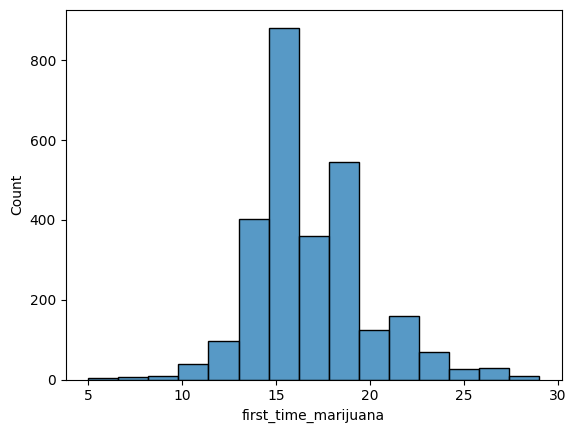

In [40]:
sns.histplot(x = 'first_time_marijuana' , data = df, bins= 15)

<Axes: xlabel='first_time_marijuana'>

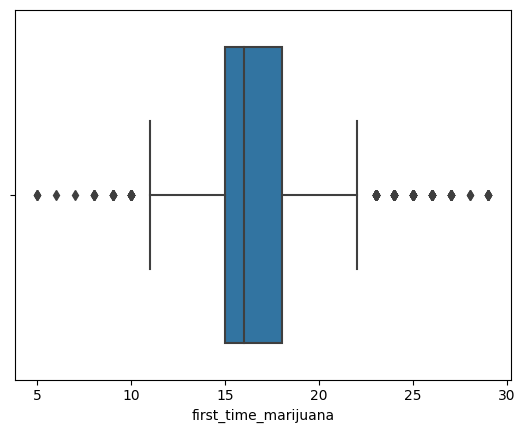

In [41]:
sns.boxplot(x = 'first_time_marijuana' , data = df)

In [42]:
df['H4MH2'].value_counts()

0    2004
1    1636
     1390
2    1201
3     272
8       1
Name: H4MH2, dtype: int64

In [43]:
df['isolation_from_others'] = df['H4MH2']
df['isolation_from_others'] = df['isolation_from_others'].loc[df['isolation_from_others'] !=' ' ]
df['isolation_from_others'] = df['isolation_from_others'].loc[df['isolation_from_others'] !='6' ]
df['isolation_from_others'] = df['isolation_from_others'].loc[df['isolation_from_others'] !='8' ]
df['isolation_from_others'].value_counts()

0    2004
1    1636
2    1201
3     272
Name: isolation_from_others, dtype: int64

In [44]:
df['isolation_from_others'].replace(['0','1','2','3'], ['Never','Rarely','Sometimes','Often'], inplace = True)
df['isolation_from_others'].value_counts()

Never        2004
Rarely       1636
Sometimes    1201
Often         272
Name: isolation_from_others, dtype: int64

<Axes: ylabel='isolation_from_others'>

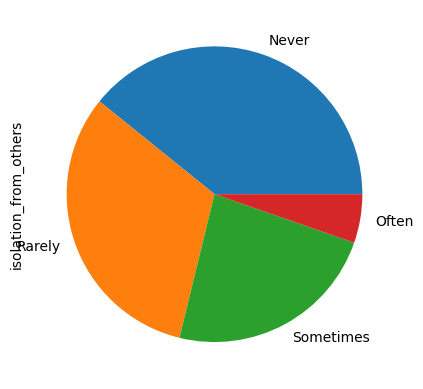

In [45]:
df['isolation_from_others'].value_counts().plot(kind ='pie')

In [46]:
rp.summary_cat(df['isolation_from_others'])

,Variable,Outcome,Count,Percent
0,isolation_from_others,Never,2004,39.19
1,,Rarely,1636,32.00
2,,Sometimes,1201,23.49
3,,Often,272,5.32


In [47]:
df.groupby('isolation_from_others')['first_time_marijuana'].agg(['mean','std']).round(2)

,mean,std
isolation_from_others,,
Never,16.75,2.95
Often,16.44,3.24
Rarely,16.88,2.87
Sometimes,16.57,3.40


<Axes: xlabel='first_time_marijuana', ylabel='isolation_from_others'>

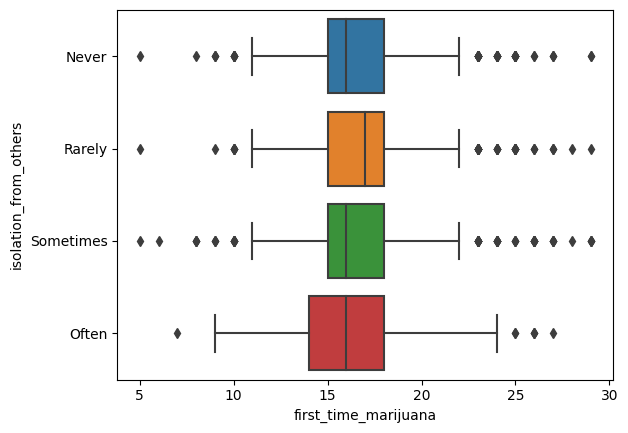

In [48]:
sns.boxplot(y = 'isolation_from_others' , x ='first_time_marijuana' , data = df)

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
model = ols('first_time_marijuana ~ C(isolation_from_others)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(isolation_from_others),3.0,55.223815,18.407938,1.959413,0.117953
Residual,2758.0,25910.364888,9.394621,NaN,NaN


In [51]:
import statsmodels.stats.multicomp as multi


In [52]:
sub = df[['first_time_marijuana','isolation_from_others']].dropna() 
mc1 = multi.MultiComparison(sub['first_time_marijuana'], sub['isolation_from_others'])
res = mc1.tukeyhsd()
print(res.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
 Never     Often  -0.3176 0.5944 -0.9703 0.3351  False
 Never    Rarely   0.1305 0.7927 -0.2331 0.4942  False
 Never Sometimes   -0.182 0.6274 -0.5722 0.2082  False
 Often    Rarely   0.4482 0.2927 -0.2062 1.1025  False
 Often Sometimes   0.1356 0.9541 -0.5338  0.805  False
Rarely Sometimes  -0.3126 0.1719 -0.7055 0.0803  False
------------------------------------------------------


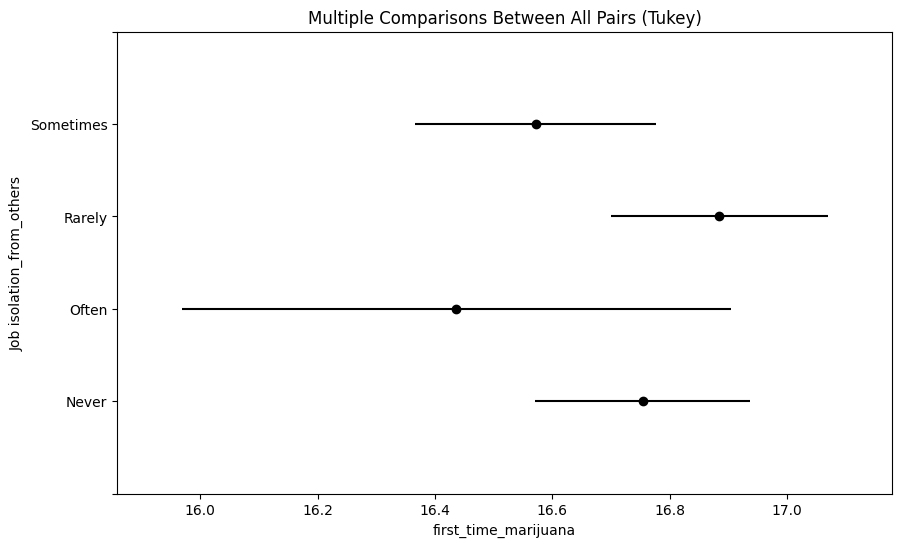

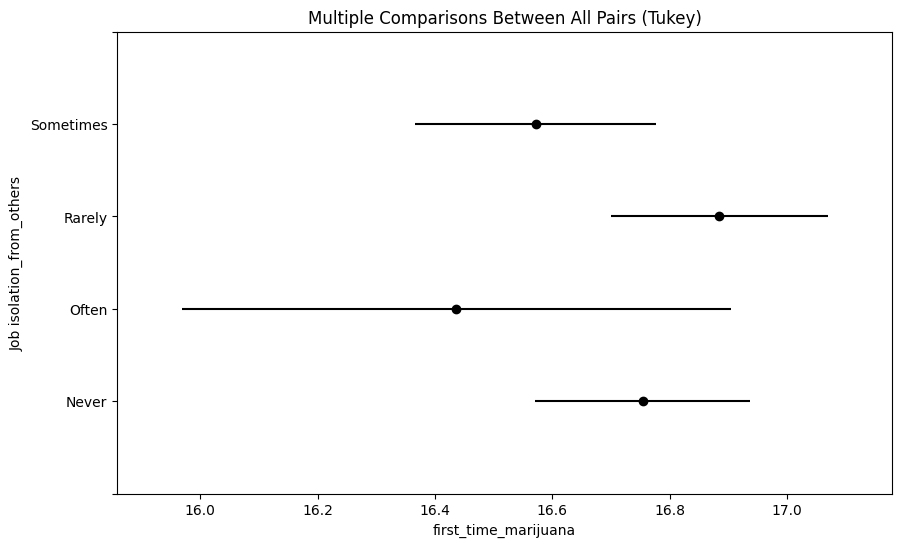

In [53]:
res.plot_simultaneous(ylabel= "isolation_from_others", xlabel= "first_time_marijuana")